# **Video Game Sales Predictor/Features**
This user-friendly interface will help the company to make decisions about the creation of the Hyperion video game. It will give them some knowledge about what variables are the most important when creating a game that will make the global sales the highest.

The data used in this notebook is public and there isn't much need for security. This notebook wil be privated though, and access will only be allowed through a shared link.

This notebook can be maintained and used in the future. It was made so that data sets of game data in the future can be plugged in and cleaned so we can look to see if any variables that affect global sales change.

In [ ]:
# Import the libraries we will be using

!pip install ipywidgets
# To enable `ipywidgets`
!jupyter nbextension enable --py widgetsnbextension

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
# My csv file will be imported from google drive. Connect my google drive here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **READ DATA CSV HERE**

Depending on where you downloaded the data from, you will need to insert the path to the csv file into the cell below.

In [ ]:
# Read CSV file here
vgs=pd.read_csv('gdrive/My Drive/Colab Notebooks/Video_Game_Sales_as_of_Jan_2017.csv') #where to load video game data and future data sets for training and helping with future games

In [ ]:
# Check that data was loaded correctly
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check data info
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


# **Exloring our Data**

What each column of our data is:
*   Name: Name/Title of the gamne
*   Platform: Platform/console the game released on
*   Year of Release
*   Genre: genre of game
*   Publisher: Company that published the game
*   NA_Sales: North American Sales (millions)
*   EU_Sales: European sales (millions)
*   JP_Sales: Japan sales (millions)
*   Other_Sales: Rest of the world sales (Africa, Australia, etc.)(millions)
*   Critic_Score: Aggregate critic score on metacritic.com
*   Critic_Count: Number of critics that scored the game on metacritic.com
*   User_Score: Aggregate user score from users of metacritic.com
*   User_Count: Number of users that scored the game on metacritic.com
*   Rating: The ESRB Rating

### **Interactive Query Dashboard to view the video games by genre**

In [ ]:
# Cell reads our csv to create a copy of the dataframe for our dropdown
vgs_dropdown=pd.read_csv('gdrive/My Drive/Colab Notebooks/Video_Game_Sales_as_of_Jan_2017.csv')

In [ ]:
# Dropdown widget that shows all video games in data set by genre
unique_genres = vgs_dropdown['Genre'].unique()
genre_dropdown = widgets.Dropdown(options=unique_genres, description='Genre:', disabled=False)

#Displays the rows with selected genre
def display_genre_rows(genre):
    if genre != 'Select a genre':
        display(vgs_dropdown[vgs_dropdown['Genre'] == genre])
    else:
        display(vgs_dropdown.head(0))

# Observe changes in the dropdown and update the display
genre_dropdown.observe(lambda change: display_genre_rows(change['new']), names='value')

# Display the genre dropdown widget
display(genre_dropdown)


Dropdown(description='Genre:', options=('Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Sho…

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.14,0.98,3.97,21.12,97.0,50.0,8.2,4009.0,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1606.0,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.17,0.06,1.41,16.30,97.0,58.0,8.1,3722.0,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,736.0,M
37,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,4.12,6.77,0.39,2.08,13.36,97.0,66.0,8.3,2955.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17387,Regular Show: Mordecai & Rigby in 8-Bit Land,3DS,2013.0,Action,Namco Bandai Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17389,Juusei to Diamond,PSP,2009.0,Action,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17394,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
17396,Shinjuku no Ookami,PS2,2009.0,Action,Spike,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


**Creating some graphs/visuals**

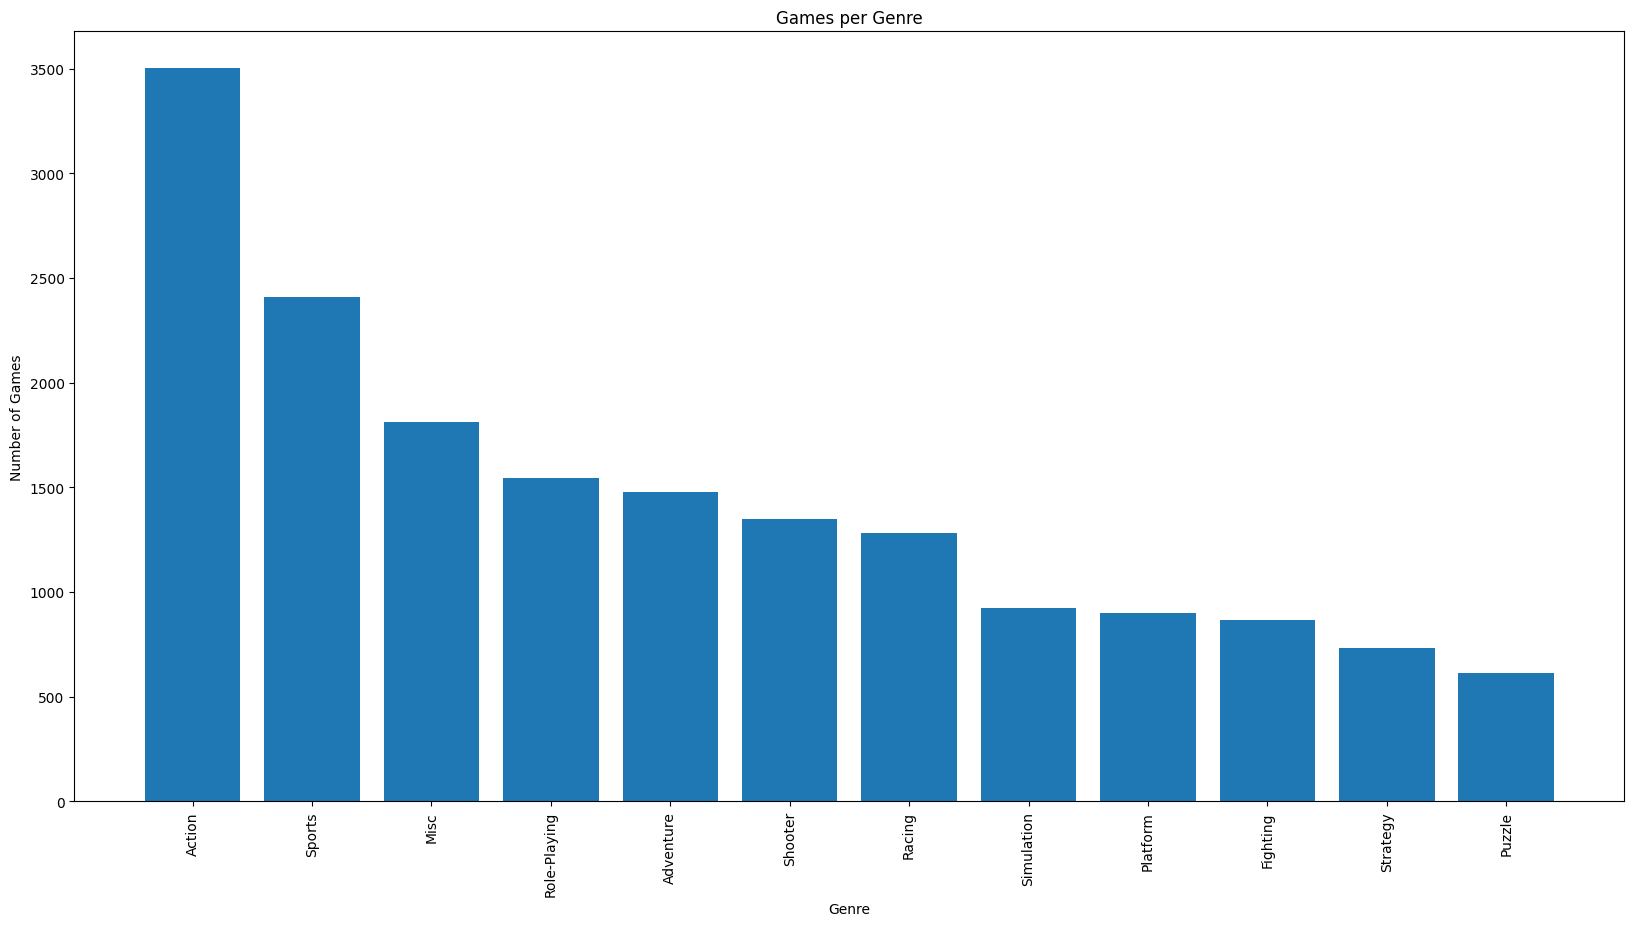

In [ ]:
# Figure showing how many games per genre
plt.figure(figsize=(20, 10))
plt.bar(vgs["Genre"].value_counts().index, vgs["Genre"].value_counts())
plt.xticks(rotation=90)
plt.title("Games per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.show()

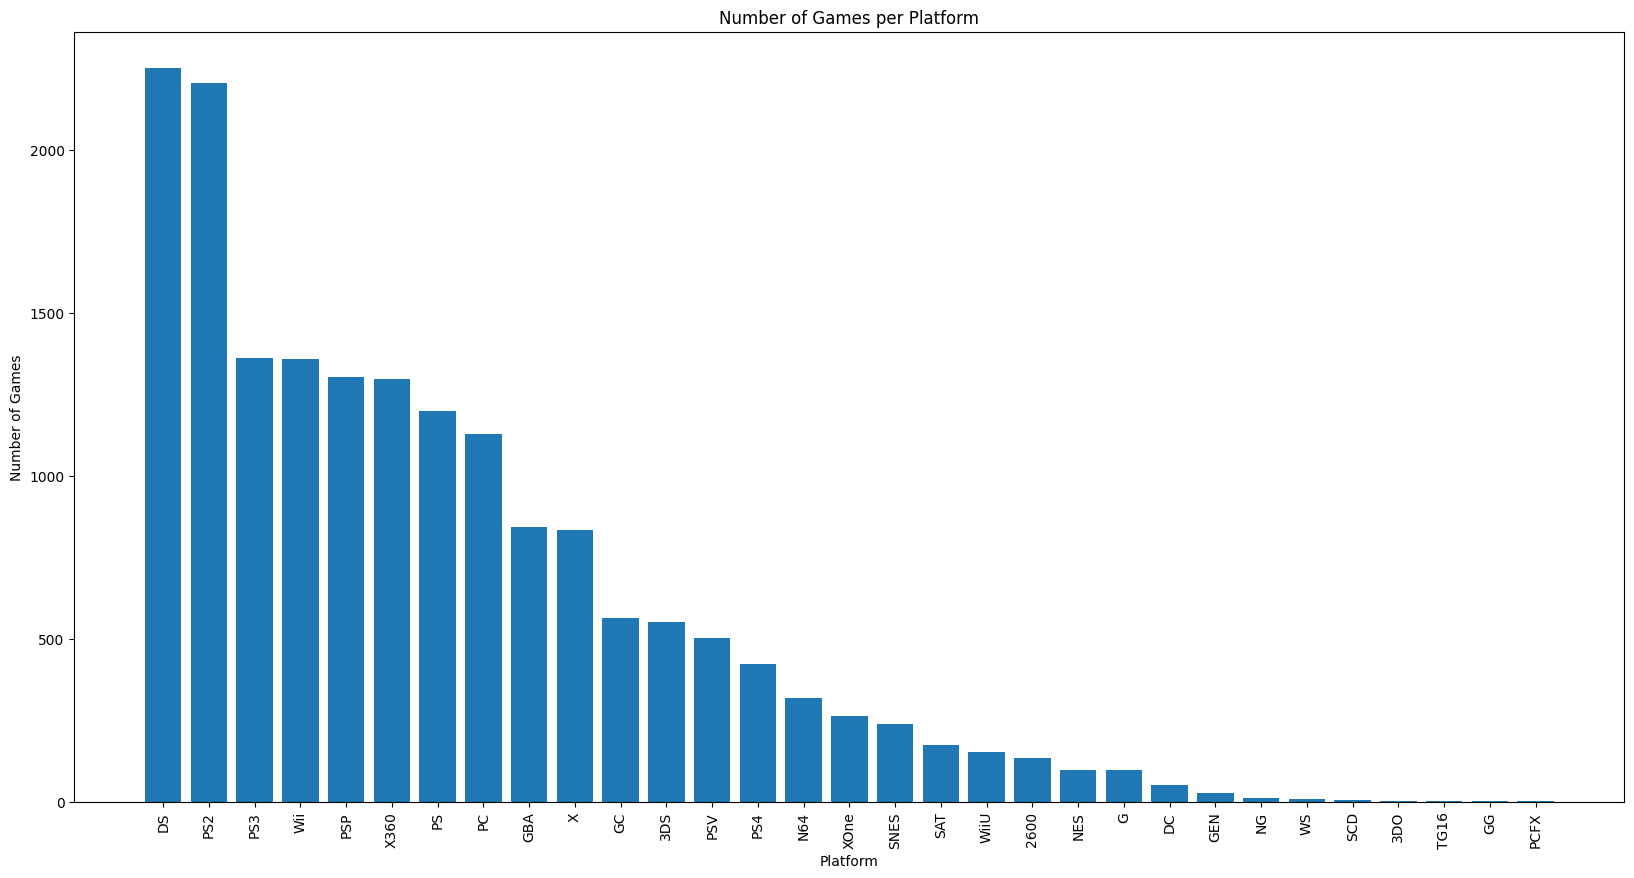

In [ ]:
# Figure Showing Games per platform
plt.figure(figsize=(20, 10))
plt.bar(vgs['Platform'].value_counts().index, vgs['Platform'].value_counts())
plt.xticks(rotation=90)
plt.title("Number of Games per Platform")
plt.ylabel("Number of Games")
plt.xlabel("Platform")
plt.show()

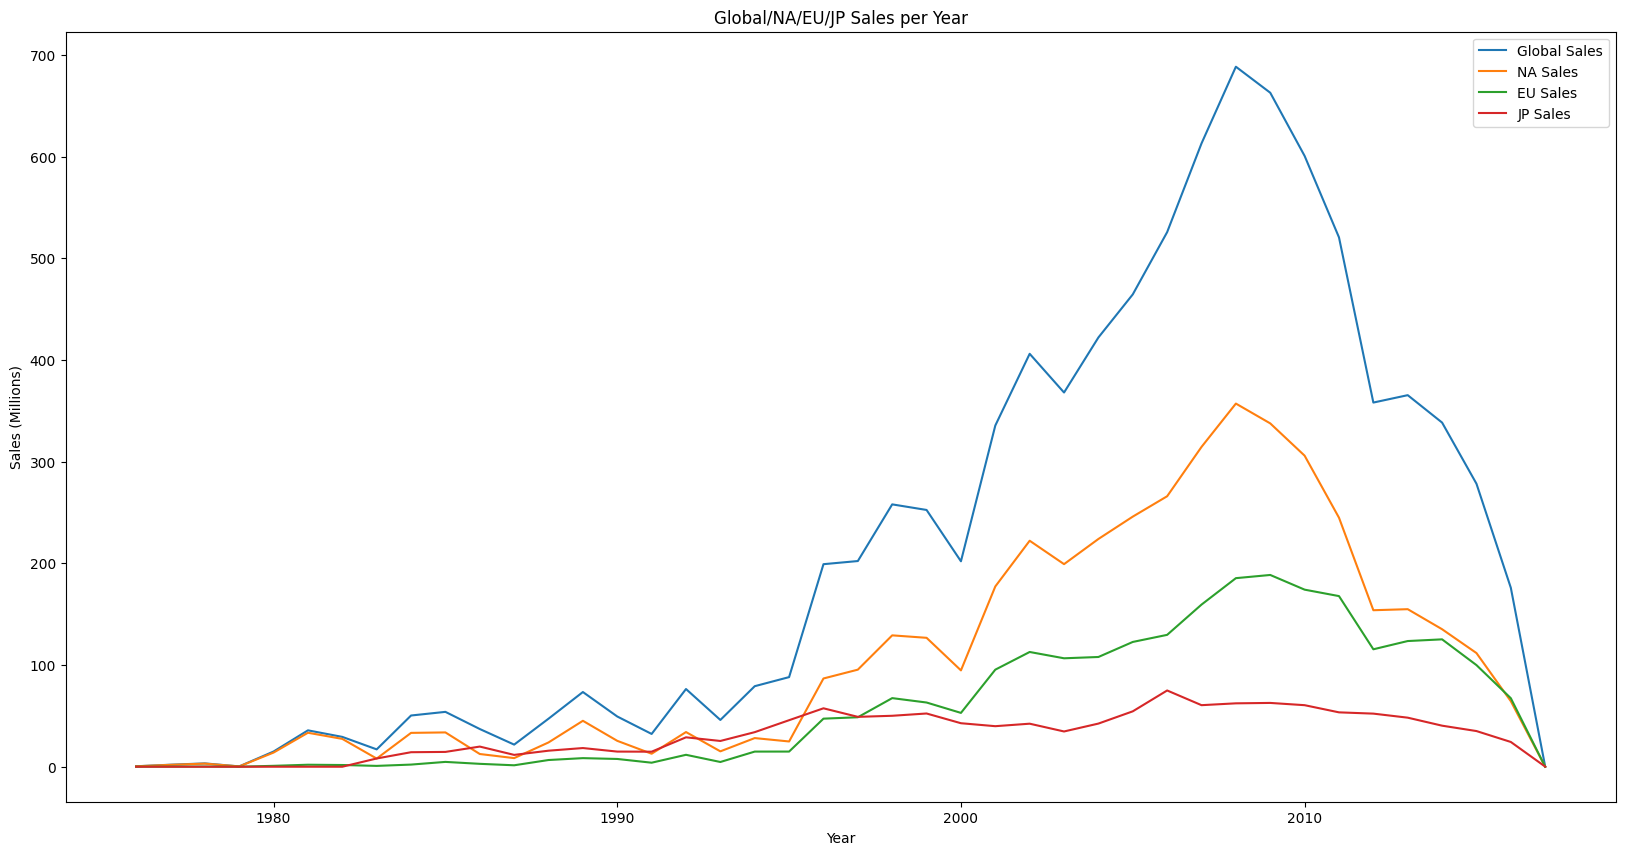

In [ ]:
# Figure Showing Sales over time
plt.figure(figsize=(20, 10))
plt.plot(vgs.groupby("Year_of_Release")["Global_Sales"].sum(), label="Global Sales")
plt.plot(vgs.groupby("Year_of_Release")["NA_Sales"].sum(), label="NA Sales")
plt.plot(vgs.groupby("Year_of_Release")["EU_Sales"].sum(), label="EU Sales")
plt.plot(vgs.groupby("Year_of_Release")["JP_Sales"].sum(), label="JP Sales")
plt.legend()
plt.title("Global/NA/EU/JP Sales per Year")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.show()


# ***Data Cleaning/Parsing***

## **Convert NonNumerical Data to Categorical**

In [ ]:
for label, content in vgs.items():
    if pd.api.types.is_string_dtype(content):
        vgs[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in vgs.items():
    if pd.api.types.is_string_dtype(content):
       print(label)

Name
Platform
Genre


In [ ]:
for col in ['Name', 'Platform', 'Genre', 'Publisher', 'Rating']:
    vgs[col] = vgs[col].astype('category')

In [ ]:
vgs.dtypes

Name               category
Platform           category
Year_of_Release     float64
Genre              category
Publisher          category
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
Critic_Score        float64
Critic_Count        float64
User_Score          float64
User_Count          float64
Rating             category
dtype: object

## **Fill Numerical Missing Values**

In [ ]:
for label, content in vgs.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Year_of_Release
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count


In [ ]:
## Check for columns with null values
for label, content in vgs.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Year_of_Release
Critic_Score
Critic_Count
User_Score
User_Count


In [ ]:
### Fill with median
for label, content in vgs.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a column which shows data was missing or not
            vgs[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            vgs[label] = content.fillna(content.median())

In [ ]:
for label, content in vgs.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
vgs.isna().sum()

Name                             0
Platform                         0
Year_of_Release                  0
Genre                            0
Publisher                        1
NA_Sales                         0
EU_Sales                         0
JP_Sales                         0
Other_Sales                      0
Global_Sales                     0
Critic_Score                     0
Critic_Count                     0
User_Score                       0
User_Count                       0
Rating                        7164
Year_of_Release_is_missing       0
Critic_Score_is_missing          0
Critic_Count_is_missing          0
User_Score_is_missing            0
User_Count_is_missing            0
dtype: int64

## **Fill Categorical Missing Data**

In [ ]:
for label, content in vgs.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Platform
Genre
Publisher
Rating


In [ ]:
for label, content in vgs.items():
    if not pd.api.types.is_numeric_dtype(content):
        vgs[label+"_is_missing"] = pd.isnull(content)
        vgs[label] = pd.Categorical(content).codes+1

In [ ]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        17416 non-null  int16  
 1   Platform                    17416 non-null  int8   
 2   Year_of_Release             17416 non-null  float64
 3   Genre                       17416 non-null  int8   
 4   Publisher                   17416 non-null  int16  
 5   NA_Sales                    17416 non-null  float64
 6   EU_Sales                    17416 non-null  float64
 7   JP_Sales                    17416 non-null  float64
 8   Other_Sales                 17416 non-null  float64
 9   Global_Sales                17416 non-null  float64
 10  Critic_Score                17416 non-null  float64
 11  Critic_Count                17416 non-null  float64
 12  User_Score                  17416 non-null  float64
 13  User_Count                  174

In [ ]:
# Check for any more missing values
vgs.isna().sum()

Name                          0
Platform                      0
Year_of_Release               0
Genre                         0
Publisher                     0
NA_Sales                      0
EU_Sales                      0
JP_Sales                      0
Other_Sales                   0
Global_Sales                  0
Critic_Score                  0
Critic_Count                  0
User_Score                    0
User_Count                    0
Rating                        0
Year_of_Release_is_missing    0
Critic_Score_is_missing       0
Critic_Count_is_missing       0
User_Score_is_missing         0
User_Count_is_missing         0
Name_is_missing               0
Platform_is_missing           0
Genre_is_missing              0
Publisher_is_missing          0
Rating_is_missing             0
dtype: int64

In [ ]:
# Processed data
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Year_of_Release_is_missing,Critic_Score_is_missing,Critic_Count_is_missing,User_Score_is_missing,User_Count_is_missing,Name_is_missing,Platform_is_missing,Genre_is_missing,Publisher_is_missing,Rating_is_missing
0,11560,27,2006.0,11,391,41.36,28.96,3.77,8.45,82.54,...,False,False,False,False,False,False,False,False,False,False
1,9812,12,1985.0,5,391,29.08,3.58,6.81,0.77,40.24,...,False,True,True,True,True,False,False,False,False,True
2,5867,27,2008.0,7,391,15.68,12.80,3.79,3.29,35.57,...,False,False,False,False,False,False,False,False,False,False
3,11562,27,2009.0,11,391,15.61,10.95,3.28,2.95,32.78,...,False,False,False,False,False,False,False,False,False,False
4,7745,6,1996.0,8,391,11.27,8.89,10.22,1.00,31.37,...,False,True,True,True,True,False,False,False,False,True


Descriptive Method

We are not removing any variables from our data set because we want to look at all of them and if they could possibly affect global sales. We are adding columns to mark if missing values were filled.

Non-Descriptive Method

Global sales will be our classifier for this project. That is the variable we are trying to predict.

# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
# Calculates the time to run the model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

model.fit(vgs.drop("Global_Sales", axis=1), vgs["Global_Sales"])

CPU times: user 20.3 s, sys: 106 ms, total: 20.4 s
Wall time: 13 s


RandomForestRegressor(n_jobs=-1, random_state=42)

# **Score the model**

*Split data into training/validation/test sets*

In [ ]:
# Split data into train, validate, and test
vgs_train, vgs_val, vgs_test = np.split(vgs.sample(frac=1), [int(.6*len(vgs)), int(.8*len(vgs))])

In [ ]:
# Check training set
vgs_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 6502 to 6543
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        10449 non-null  int16  
 1   Platform                    10449 non-null  int8   
 2   Year_of_Release             10449 non-null  float64
 3   Genre                       10449 non-null  int8   
 4   Publisher                   10449 non-null  int16  
 5   NA_Sales                    10449 non-null  float64
 6   EU_Sales                    10449 non-null  float64
 7   JP_Sales                    10449 non-null  float64
 8   Other_Sales                 10449 non-null  float64
 9   Global_Sales                10449 non-null  float64
 10  Critic_Score                10449 non-null  float64
 11  Critic_Count                10449 non-null  float64
 12  User_Score                  10449 non-null  float64
 13  User_Count                  10449 

In [ ]:
# Check Validation set
vgs_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3483 entries, 14815 to 6799
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        3483 non-null   int16  
 1   Platform                    3483 non-null   int8   
 2   Year_of_Release             3483 non-null   float64
 3   Genre                       3483 non-null   int8   
 4   Publisher                   3483 non-null   int16  
 5   NA_Sales                    3483 non-null   float64
 6   EU_Sales                    3483 non-null   float64
 7   JP_Sales                    3483 non-null   float64
 8   Other_Sales                 3483 non-null   float64
 9   Global_Sales                3483 non-null   float64
 10  Critic_Score                3483 non-null   float64
 11  Critic_Count                3483 non-null   float64
 12  User_Score                  3483 non-null   float64
 13  User_Count                  3483 n

In [ ]:
# Check test set
vgs_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3484 entries, 1980 to 463
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        3484 non-null   int16  
 1   Platform                    3484 non-null   int8   
 2   Year_of_Release             3484 non-null   float64
 3   Genre                       3484 non-null   int8   
 4   Publisher                   3484 non-null   int16  
 5   NA_Sales                    3484 non-null   float64
 6   EU_Sales                    3484 non-null   float64
 7   JP_Sales                    3484 non-null   float64
 8   Other_Sales                 3484 non-null   float64
 9   Global_Sales                3484 non-null   float64
 10  Critic_Score                3484 non-null   float64
 11  Critic_Count                3484 non-null   float64
 12  User_Score                  3484 non-null   float64
 13  User_Count                  3484 non

In [ ]:
#Split train/val data into x/y and check shape
x_train, y_train = vgs_train.drop("Global_Sales", axis=1), vgs_train.Global_Sales

x_val, y_val = vgs_val.drop("Global_Sales", axis=1), vgs_val.Global_Sales

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((10449, 24), (10449,), (3483, 24), (3483,))

# **Evaluation Function**

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# import our scoring metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error as mse

def root_mean_squared_error(y_true, y_pred):
    """Calculate RMSE."""
    return mse(y_true, y_pred, squared=False)


In [ ]:
# Function that will show scores

def show_scores(model):
    train_predict = model.predict(x_train)
    val_predict = model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_predict),
              "Valid MAE": mean_absolute_error(y_val, val_predict),
              "Training RMSE": root_mean_squared_error(y_train, train_predict),
              "Valid RMSE": root_mean_squared_error(y_val, val_predict),
              "Training R2": model.score(x_train, y_train),
              "Valid R2": model.score(x_val, y_val)}
    return scores

# **Test Model and Tune Hyperparameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt", "auto"],
           "max_samples": [8000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    def _fit_and_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    # We need this because some estimators validate X and y
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 96, in 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'max_samples': [8000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

# Best found paramters found when testing the model
#'n_estimators': 70,
#'min_samples_split': 6,
#'min_samples_leaf': 3,
#'max_samples': 8000,
#'max_features': 1.0,
#'max_depth': None}

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 8000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
# Evaluate RandomForestRegressor Model
show_scores(rs_model)

{'Training MAE': 0.09201405328491585,
 'Valid MAE': 0.10297902174326397,
 'Training RMSE': 0.18974136733293087,
 'Valid RMSE': 0.2936390239894397,
 'Training R2': 0.9818384261152757,
 'Valid R2': 0.9481233012794364}

In [ ]:
%%time
# Putting the most ideal hyperparameters into our model
ideal_model = RandomForestRegressor(n_estimators=70,
                                    max_depth=None,
                                    min_samples_leaf=3,
                                    min_samples_split=6,
                                    max_features= 1.0,
                                    n_jobs=-1,
                                    max_samples=8000,
                                    random_state=42)
ideal_model.fit(x_train, y_train)


CPU times: user 6.09 s, sys: 45.1 ms, total: 6.13 s
Wall time: 6.91 s


RandomForestRegressor(max_samples=8000, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=70, n_jobs=-1, random_state=42)

In [ ]:
# Show score from our ideal model with best hyperparameters
show_scores(ideal_model)

# Best Scores found
# 'Training MAE': 0.0198702482943398,
# 'Valid MAE': 0.03536084451223187,
# 'Training RMSE': 0.1626906245089742,
# 'Valid RMSE': 0.2638470659072254,
# 'Training R2': 0.9866477491608829,
# 'Valid R2': 0.958115886738352}


{'Training MAE': 0.0198702482943398,
 'Valid MAE': 0.03536084451223187,
 'Training RMSE': 0.1626906245089742,
 'Valid RMSE': 0.2638470659072254,
 'Training R2': 0.9866477491608829,
 'Valid R2': 0.958115886738352}

# **Predicting on Test Data**

In [ ]:
# Check test Data
vgs_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3484 entries, 16087 to 10543
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        3484 non-null   int16  
 1   Platform                    3484 non-null   int8   
 2   Year_of_Release             3484 non-null   float64
 3   Genre                       3484 non-null   int8   
 4   Publisher                   3484 non-null   int16  
 5   NA_Sales                    3484 non-null   float64
 6   EU_Sales                    3484 non-null   float64
 7   JP_Sales                    3484 non-null   float64
 8   Other_Sales                 3484 non-null   float64
 9   Global_Sales                3484 non-null   float64
 10  Critic_Score                3484 non-null   float64
 11  Critic_Count                3484 non-null   float64
 12  User_Score                  3484 non-null   float64
 13  User_Count                  3484 

In [ ]:
# Drop Global Sales column from test data
x_test, y_test = vgs_test.drop("Global_Sales", axis=1), vgs_test.Global_Sales

In [ ]:
vgs_test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Year_of_Release_is_missing,Critic_Score_is_missing,Critic_Count_is_missing,User_Score_is_missing,User_Count_is_missing,Name_is_missing,Platform_is_missing,Genre_is_missing,Publisher_is_missing,Rating_is_missing
16087,11075,3,2013.0,11,119,0.00,0.01,0.00,0.00,0.02,...,False,True,True,False,False,False,False,False,False,False
14100,10458,21,2015.0,8,287,0.00,0.00,0.04,0.00,0.04,...,False,True,True,True,True,False,False,False,False,True
4187,10585,27,2007.0,10,151,0.41,0.02,0.00,0.04,0.47,...,False,False,False,False,False,False,False,False,False,False
1839,11874,12,1992.0,6,391,0.41,0.06,0.63,0.02,1.12,...,False,True,True,True,True,False,False,False,False,True
17220,5564,5,2010.0,2,122,0.00,0.01,0.00,0.00,0.01,...,False,True,True,True,True,False,False,False,False,True


In [ ]:
test_preds = ideal_model.predict(x_test)

NameError: name 'ideal_model' is not defined

In [ ]:
## Format Predictions
df_preds = pd.DataFrame()
df_preds["Name"] = vgs_test["Name"]
df_preds["Global_Sales"] = test_preds

df_preds

,Name,Global_Sales
16087,11075,0.010193
14100,10458,0.040607
4187,10585,0.479787
1839,11874,1.080338
17220,5564,0.010660
...,...,...
16463,7004,0.010000
13814,3966,0.032945
14123,5436,0.042797
1086,10733,1.549794


# **Dashboard**
## **Feature Importance**

Which attributes were most important when predicting global sales

In [ ]:
# Plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

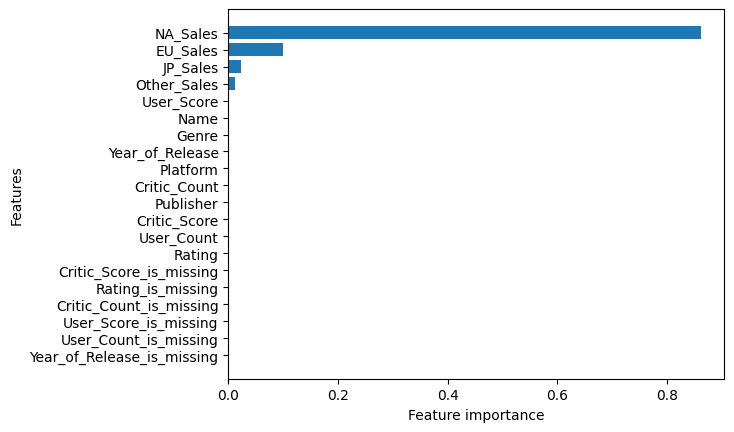

In [ ]:
# Visualization 1
plot_features(x_train.columns, ideal_model.feature_importances_)

# **Heatmap of Features**


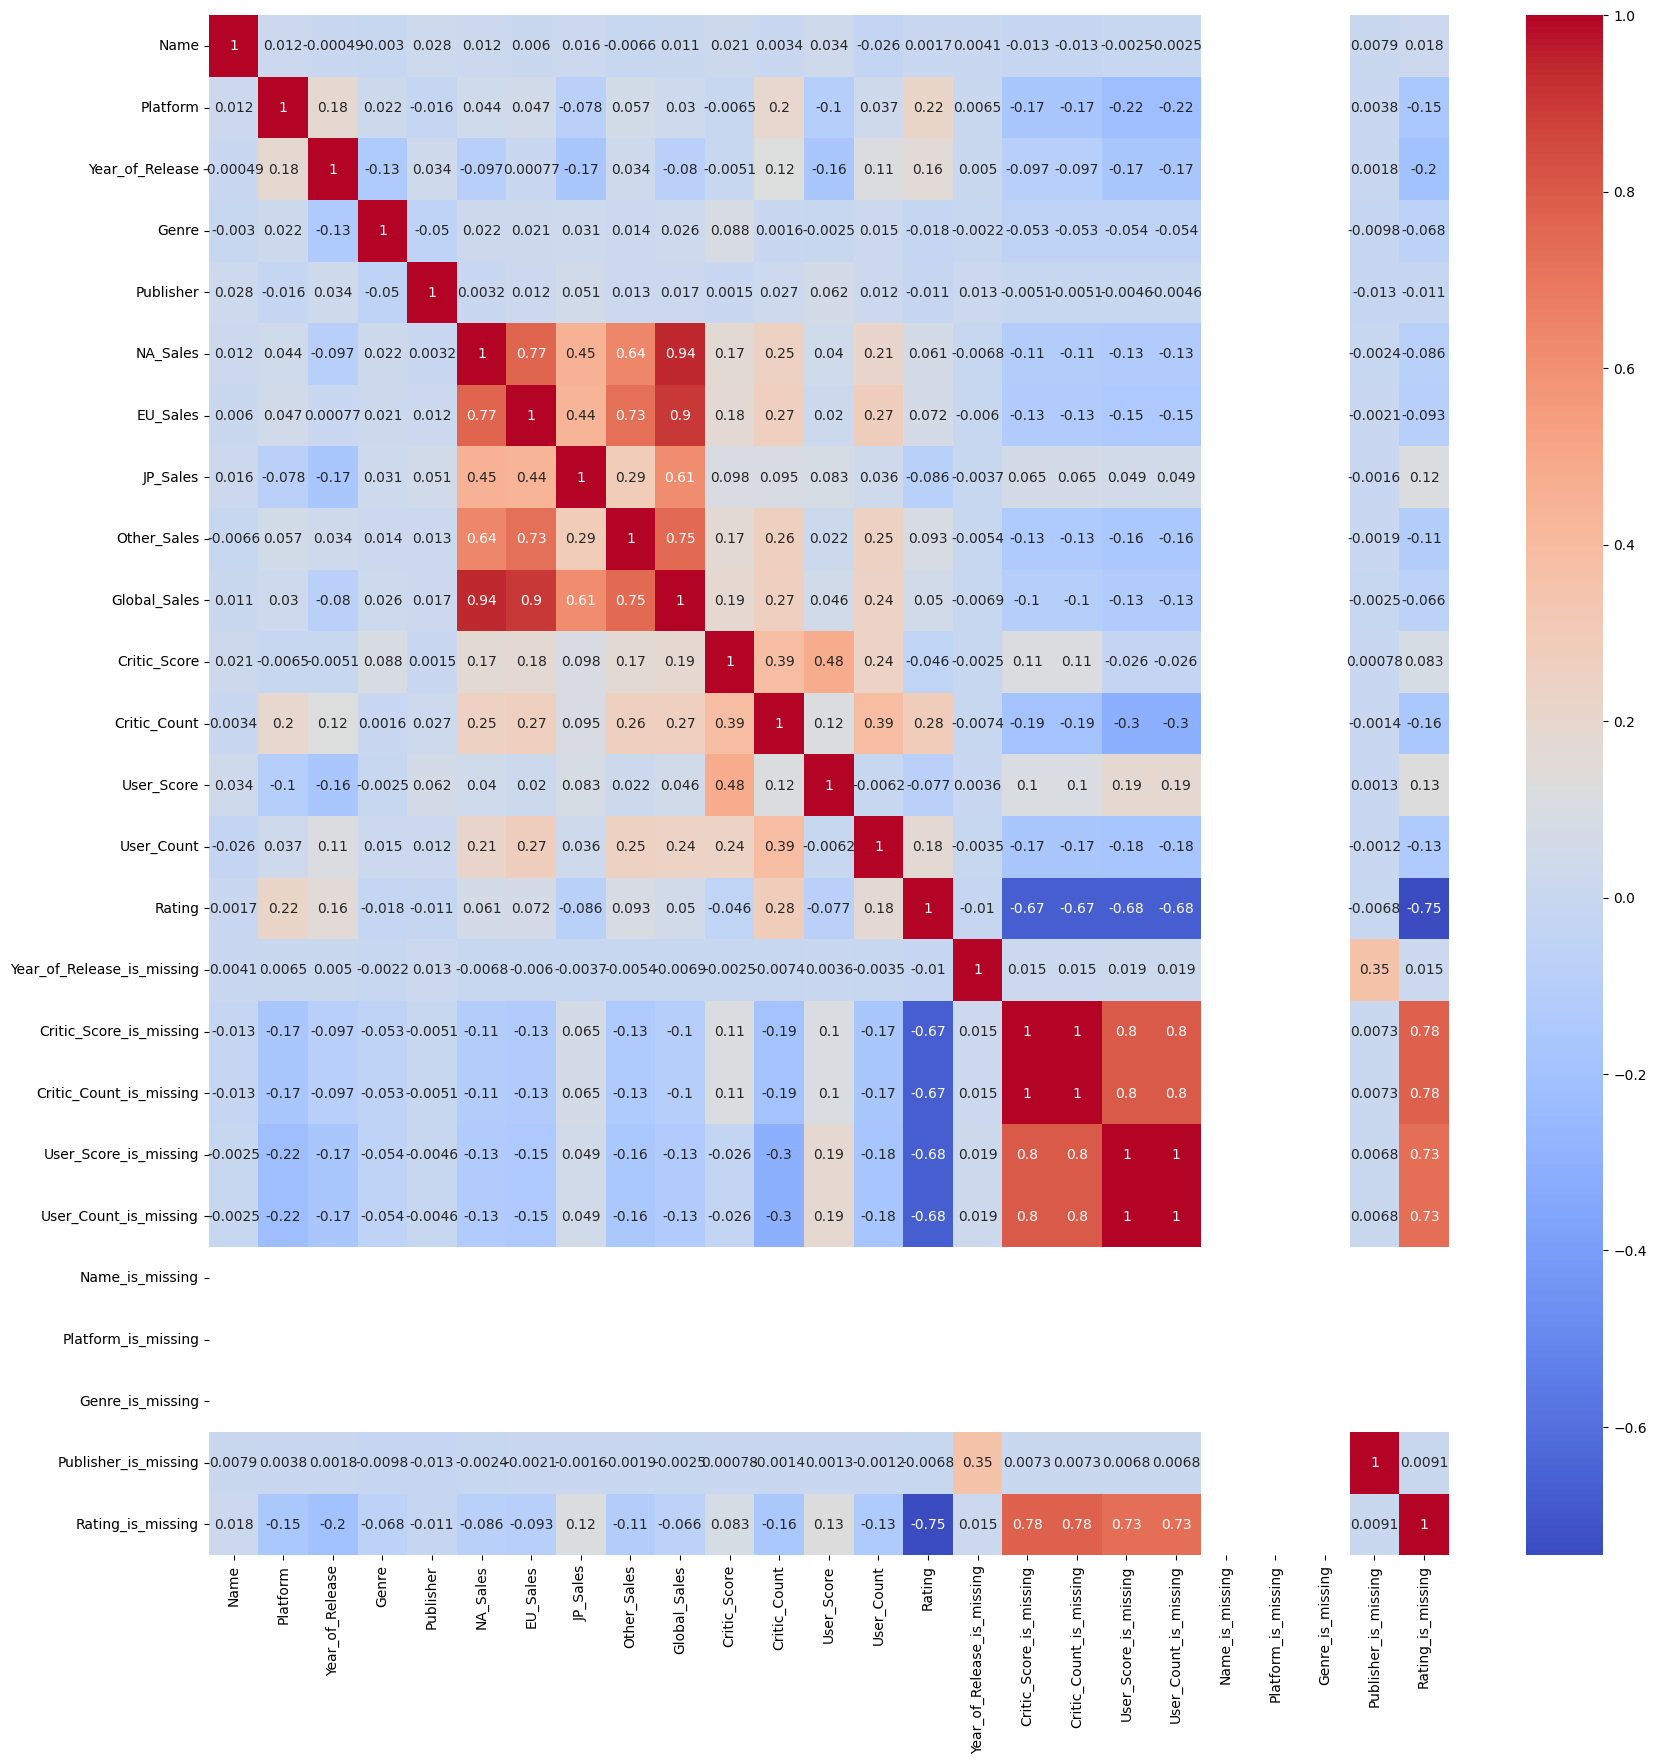

In [ ]:
# Visualization 2
plt.figure(figsize = (20,20))
sns.heatmap(vgs.corr(), annot=True, cmap='coolwarm')
plt.show()

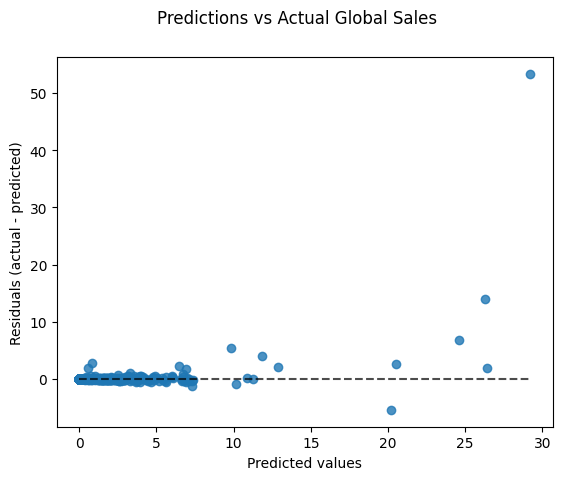

In [ ]:
# Visualization 3
#Predictions vs Actual Global Sales Graph
from sklearn.metrics import PredictionErrorDisplay

pred_vs_true = PredictionErrorDisplay(y_true=y_test, y_pred=test_preds)
pred_vs_true.plot()
pred_vs_true.figure_.suptitle("Predictions vs Actual Global Sales")
plt.show()

# **Model to predict sales (optional)**

* Clean data
* insert into model


These only need to be ran if the user wants to run the model to predict global sales on the data set. Remove the comment # to run it.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Read CSV file here

vgs_to_predict=pd.read_csv('gdrive/My Drive/Colab Notebooks/Video_Game_Sales_as_of_Jan_2017.csv') #### Data you want to predict goes HERE


#clean the data

#Convert categories
for label, content in vgs_to_predict.items():
    if pd.api.types.is_string_dtype(content):
        vgs_to_predict[label] = content.astype("category").cat.as_ordered()

for col in ['Name', 'Platform', 'Genre', 'Publisher', 'Rating']:
    vgs_to_predict[col] = vgs_to_predict[col].astype('category')

#Fill numerical missing values
### Fill with median
for label, content in vgs_to_predict.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a column which shows data was missing or not
            vgs_to_predict[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            vgs_to_predict[label] = content.fillna(content.median())

# Fill categorical missing data
for label, content in vgs_to_predict.items():
    if not pd.api.types.is_numeric_dtype(content):
        vgs_to_predict[label+"_is_missing"] = pd.isnull(content)
        vgs_to_predict[label] = pd.Categorical(content).codes+1




#  Data to put into our ideal model below
x_to_predict, y_to_predict = vgs_to_predict.drop("Global_Sales", axis=1), vgs_to_predict.Global_Sales


# Putting the most ideal hyperparameters into our model
ideal_model = RandomForestRegressor(n_estimators=70,
                                    max_depth=None,
                                    min_samples_leaf=3,
                                    min_samples_split=6,
                                    max_features= 1.0,
                                    n_jobs=-1,
                                    max_samples=8000,
                                    random_state=42)
ideal_model.fit(x_to_predict, y_to_predict)

# Predictions
vgs_to_predict_idealmodel_preds = ideal_model.predict(x_to_predict)

## Format Predictions
vgs_to_predict_preds = pd.DataFrame()
vgs_to_predict_preds["Name"] = vgs_to_predict["Name"]
vgs_to_predict_preds["Global_Sales"] = vgs_to_predict_idealmodel_preds

vgs_to_predict_preds

,Name,Global_Sales
0,11560,38.497737
1,9812,33.499634
2,5867,35.220944
3,11562,35.912330
4,7745,26.815282
...,...,...
17411,6916,0.010107
17412,3221,0.010000
17413,515,0.010000
17414,6887,0.010000
